In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_excel("/content/DataDNA Dataset Challenge - E-commerce Dataset - November 2025.xlsx")

In [3]:
df.head()

,event_id,event_type,event_date,customer_id,product_id,country,latitude,longitude,region,channel,...,unit_price_local,discount_code,discount_local,tax_local,net_revenue_local,fx_rate_to_usd,net_revenue_usd,is_refunded,refund_datetime,refund_reason
0,DB4F1A096586,order,2024-12-09 00:11:27,CUST0001946,PROD0083,United States,39.8283,-98.5795,NaN,Website,...,36.70,NaN,0.0,0.00,110.10,1.00,110.10,False,NaT,NaN
1,3550A69EEA36,order,2025-08-11 21:31:03,CUST0003776,PROD0049,Australia,-25.2744,133.7751,APAC,Website,...,19.70,NaN,0.0,9.85,108.35,0.66,71.51,False,NaT,NaN
2,0C3CAE65E90C,order,2025-09-30 15:39:28,CUST0001105,PROD0075,Canada,56.1304,-106.3468,NaN,Website,...,20.12,NaN,0.0,1.01,21.13,1.00,21.13,False,NaT,NaN
3,7DDC83355865,invoice,2024-09-26 04:13:11,CUST0003164,PROD0017,United States,39.8283,-98.5795,NaN,Partner,...,19.00,NaN,0.0,0.00,190.00,1.00,190.00,False,NaT,NaN
4,DAE0B37D8815,order,2024-06-23 16:03:04,CUST0003410,PROD0099,United States,39.8283,-98.5795,NaN,Website,...,29.38,NaN,0.0,0.00,88.14,1.00,88.14,False,NaT,NaN


In [4]:
df.columns

Index(['event_id', 'event_type', 'event_date', 'customer_id', 'product_id',
       'country', 'latitude', 'longitude', 'region', 'channel',
       'payment_method', 'currency', 'quantity', 'unit_price_local',
       'discount_code', 'discount_local', 'tax_local', 'net_revenue_local',
       'fx_rate_to_usd', 'net_revenue_usd', 'is_refunded', 'refund_datetime',
       'refund_reason'],
      dtype='object')

In [5]:
df.shape

(48000, 23)

In [6]:
df.dtypes

,0
event_id,object
event_type,object
event_date,datetime64[ns]
customer_id,object
product_id,object
country,object
latitude,float64
longitude,float64
region,object
channel,object


In [7]:
df.isnull().sum()

,0
event_id,0
event_type,0
event_date,0
customer_id,0
product_id,0
country,0
latitude,0
longitude,0
region,19579
channel,0


In [8]:
# So the missing region is replacable by unknown
# the discount code is missing. that may be because the dont get
# any discount - so we can replace it by no_discount
# refund datetime not mention _ because the refund datetime and
# refund reason are the products which is not refunded
# thats why they didnt mention the date and also the reason.

In [9]:
# so lets fill the missing

In [10]:
df['region'] = df['region'].fillna("Unknown")

In [11]:
df['discount_code'] = df['discount_code'].fillna("No_Discount")

In [12]:
df['refund_reason'] = df['refund_reason'].fillna("Not_Refunded")

In [13]:
# verify the missing values

In [14]:
df.isnull().sum()

,0
event_id,0
event_type,0
event_date,0
customer_id,0
product_id,0
country,0
latitude,0
longitude,0
region,0
channel,0


In [15]:
# refund_datetime is intentinally showing	46995, that mean 46995
# orders are not refunded yet.

In [16]:
df.head(1)

,event_id,event_type,event_date,customer_id,product_id,country,latitude,longitude,region,channel,...,unit_price_local,discount_code,discount_local,tax_local,net_revenue_local,fx_rate_to_usd,net_revenue_usd,is_refunded,refund_datetime,refund_reason
0,DB4F1A096586,order,2024-12-09 00:11:27,CUST0001946,PROD0083,United States,39.8283,-98.5795,Unknown,Website,...,36.7,No_Discount,0.0,0.0,110.1,1.0,110.1,False,NaT,Not_Refunded


In [17]:
# lets find out the objects columns

In [18]:
df.select_dtypes(include=["object"]).columns

Index(['event_id', 'event_type', 'customer_id', 'product_id', 'country',
       'region', 'channel', 'payment_method', 'currency', 'discount_code',
       'refund_reason'],
      dtype='object')

In [19]:
cat_col = ['event_id', 'event_type', 'customer_id', 'product_id', 'country',
       'region', 'channel', 'payment_method', 'currency', 'discount_code',
       'refund_reason']

In [20]:
for i in cat_col:
  print(i, " : - ", df[i].unique() )
  print(".............................")

event_id  : -  ['DB4F1A096586' '3550A69EEA36' '0C3CAE65E90C' ... '31681CA1A687'
 'E5332EABFA60' '64381905AD06']
.............................
event_type  : -  ['order' 'invoice']
.............................
customer_id  : -  ['CUST0001946' 'CUST0003776' 'CUST0001105' ... 'CUST0001996' 'CUST0001296'
 'CUST0003384']
.............................
product_id  : -  ['PROD0083' 'PROD0049' 'PROD0075' 'PROD0017' 'PROD0099' 'PROD0026'
 'PROD0059' 'PROD0100' 'PROD0027' 'PROD0067' 'PROD0047' 'PROD0055'
 'PROD0078' 'PROD0074' 'PROD0076' 'PROD0053' 'PROD0003' 'PROD0033'
 'PROD0020' 'PROD0022' 'PROD0012' 'PROD0087' 'PROD0002' 'PROD0019'
 'PROD0025' 'PROD0029' 'PROD0041' 'PROD0077' 'PROD0023' 'PROD0035'
 'PROD0006' 'PROD0052' 'PROD0089' 'PROD0086' 'PROD0050' 'PROD0046'
 'PROD0072' 'PROD0008' 'PROD0007' 'PROD0080' 'PROD0039' 'PROD0084'
 'PROD0011' 'PROD0062' 'PROD0063' 'PROD0037' 'PROD0095' 'PROD0001'
 'PROD0048' 'PROD0090' 'PROD0042' 'PROD0082' 'PROD0060' 'PROD0073'
 'PROD0038' 'PROD0014' 'PROD0066

In [21]:
# lets do the feature engg.
# drop the event_id, customer_id, product_id

In [22]:
df.drop(columns=['event_id', 'customer_id', 'product_id'], inplace=True)

In [23]:
df.head()

,event_type,event_date,country,latitude,longitude,region,channel,payment_method,currency,quantity,unit_price_local,discount_code,discount_local,tax_local,net_revenue_local,fx_rate_to_usd,net_revenue_usd,is_refunded,refund_datetime,refund_reason
0,order,2024-12-09 00:11:27,United States,39.8283,-98.5795,Unknown,Website,Credit Card,USD,3,36.70,No_Discount,0.0,0.00,110.10,1.00,110.10,False,NaT,Not_Refunded
1,order,2025-08-11 21:31:03,Australia,-25.2744,133.7751,APAC,Website,Invoice,AUD,5,19.70,No_Discount,0.0,9.85,108.35,0.66,71.51,False,NaT,Not_Refunded
2,order,2025-09-30 15:39:28,Canada,56.1304,-106.3468,Unknown,Website,Credit Card,USD,1,20.12,No_Discount,0.0,1.01,21.13,1.00,21.13,False,NaT,Not_Refunded
3,invoice,2024-09-26 04:13:11,United States,39.8283,-98.5795,Unknown,Partner,Credit Card,USD,10,19.00,No_Discount,0.0,0.00,190.00,1.00,190.00,False,NaT,Not_Refunded
4,order,2024-06-23 16:03:04,United States,39.8283,-98.5795,Unknown,Website,Credit Card,USD,3,29.38,No_Discount,0.0,0.00,88.14,1.00,88.14,False,NaT,Not_Refunded


In [24]:
# lets check the duplicate records

df.duplicated().sum()

np.int64(0)

In [25]:
# lets start for EDA  -

In [26]:
df.columns

Index(['event_type', 'event_date', 'country', 'latitude', 'longitude',
       'region', 'channel', 'payment_method', 'currency', 'quantity',
       'unit_price_local', 'discount_code', 'discount_local', 'tax_local',
       'net_revenue_local', 'fx_rate_to_usd', 'net_revenue_usd', 'is_refunded',
       'refund_datetime', 'refund_reason'],
      dtype='object')

In [27]:
# lests check fro the event types

In [28]:
# What is total number of record & unique

In [29]:
df.shape

(48000, 20)

In [30]:
len(df)

48000

In [31]:
#  Total record is 4800

In [32]:
df['event_type'].unique()

array(['order', 'invoice'], dtype=object)

In [33]:
#3 - Time range of dataset

In [34]:
min_date = df ["event_date"].min()

In [35]:
mix_date = df["event_date"].max()

In [36]:
print("The Range is from ",min_date,"to", 'max_date')

The Range is from  2024-04-22 00:09:01 to max_date


In [37]:
print({f"The Range is from from"})

{'The Range is from from'}


In [38]:
#4- Duplicte or missing data

In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
df.isnull().sum()

,0
event_type,0
event_date,0
country,0
latitude,0
longitude,0
region,0
channel,0
payment_method,0
currency,0
quantity,0


In [41]:
for i in ["event_date","country","net_revenue_usd"]:
  print(f"duplicated valus in {i} is ",df[i].duplicated().sum())
  print(f"Missing values in {i} is",df[i].isnull().sum())
  print("--------------------------------------------")

duplicated valus in event_date is  24
Missing values in event_date is 0
--------------------------------------------
duplicated valus in country is  47990
Missing values in country is 0
--------------------------------------------
duplicated valus in net_revenue_usd is  42717
Missing values in net_revenue_usd is 0
--------------------------------------------


In [42]:
#5- Country by most total revenue

In [43]:
rev= df.groupby("country")["net_revenue_usd"].sum().sort_values(ascending=False)

In [44]:
top5= rev.head(5)

In [45]:
top5

,net_revenue_usd
country,
United States,8576828.53
United Kingdom,5035009.06
Canada,3194218.95
Australia,3192846.14
Germany,2685114.73


In [46]:
top5=top5.reset_index()

/tmp/ipython-input-2629447120.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5,x="country",y="net_revenue_usd",palette="Set2")


<Axes: xlabel='country', ylabel='net_revenue_usd'>

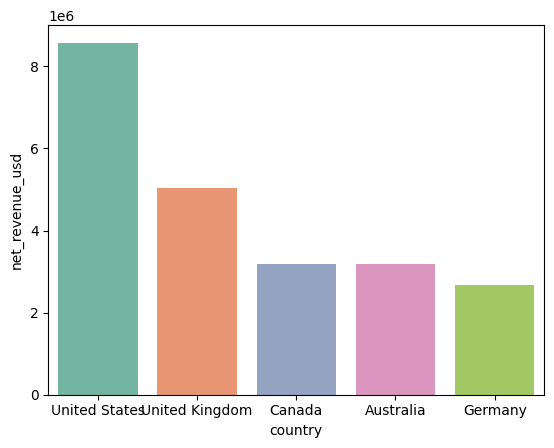

In [47]:
sns.barplot(data=top5,x="country",y="net_revenue_usd",palette="Set2")

In [48]:
#6 - What is avg rage order values revenue

In [49]:
df.groupby("region")["net_revenue_usd"].mean().sort_values(ascending=False)

,net_revenue_usd
region,
LATAM,719.426145
EU,719.146201
APAC,667.380385
Unknown,601.207798


In [50]:

df. groupby ("region")["net_revenue_usd"].mean().sort_values(ascending=False)

,net_revenue_usd
region,
LATAM,719.426145
EU,719.146201
APAC,667.380385
Unknown,601.207798


In [51]:
avg1=df. groupby ("region")["net_revenue_usd"].mean().sort_values(ascending=False)

In [52]:
avg1=avg1.head(5)

In [53]:
avg1

,net_revenue_usd
region,
LATAM,719.426145
EU,719.146201
APAC,667.380385
Unknown,601.207798


In [54]:
# 7 no.od order varry accross region and country

In [55]:
df['region'].value_counts().sort_values()

,count
region,
LATAM,2075
APAC,7306
EU,19040
Unknown,19579


In [56]:
reg=df['region'].value_counts().sort_values().reset_index()

In [57]:
reg

,region,count
0,LATAM,2075
1,APAC,7306
2,EU,19040
3,Unknown,19579


<Axes: xlabel='region', ylabel='count'>

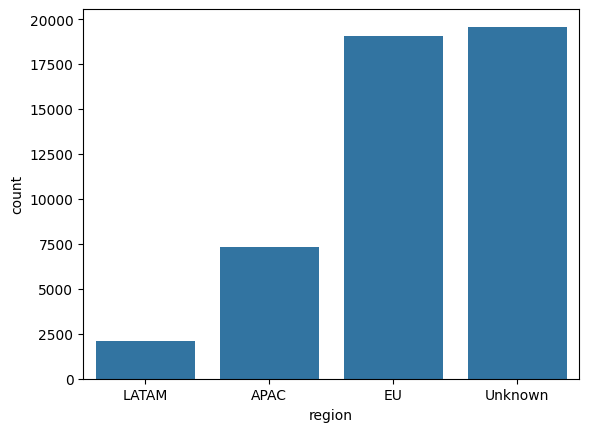

In [58]:
sns.barplot(data=reg,x="region",y="count")

In [59]:
df['country'].value_counts().sort_values()

,count
country,
Brazil,2075
Spain,2335
Philippines,2470
Netherlands,2519
France,3337
Germany,3587
Australia,4836
Canada,4844
United Kingdom,7262


In [60]:
reg1 =df["country"].value_counts().sort_values().reset_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Brazil'),
  Text(1, 0, 'Spain'),
  Text(2, 0, 'Philippines'),
  Text(3, 0, 'Netherlands'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'United Kingdom'),
  Text(9, 0, 'United States')])

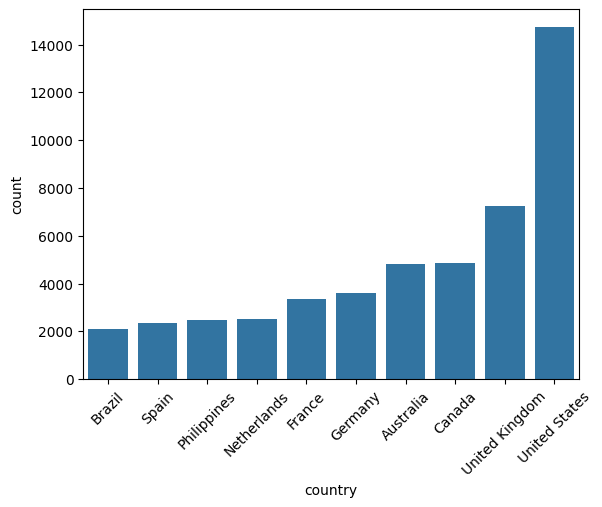

In [61]:
sns.barplot(data=reg1, x="country",y="count")
plt.xticks(rotation=45)


In [62]:
# 8- Which country highest refund rate

In [66]:
df.groupby("country")["is_refunded"].mean().sort_values(ascending=False)*100

,is_refunded
country,
Brazil,2.457831
Canada,2.374071
Australia,2.315964
Germany,2.202398
United Kingdom,2.161939
France,2.067726
Netherlands,1.984915
United States,1.954530
Spain,1.798715


In [78]:
high=df.groupby("country")["is_refunded"].mean().sort_values(ascending=False)*100

In [79]:
high=high.head(5)

In [75]:
high

,country,is_refunded
0,Brazil,2.457831
1,Canada,2.374071
2,Australia,2.315964


In [80]:
high = high.reset_index()

In [81]:
high

,country,is_refunded
0,Brazil,2.457831
1,Canada,2.374071
2,Australia,2.315964
3,Germany,2.202398
4,United Kingdom,2.161939


/tmp/ipython-input-1645131169.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high,x="is_refunded",y="country",palette="mako")


<Axes: xlabel='is_refunded', ylabel='country'>

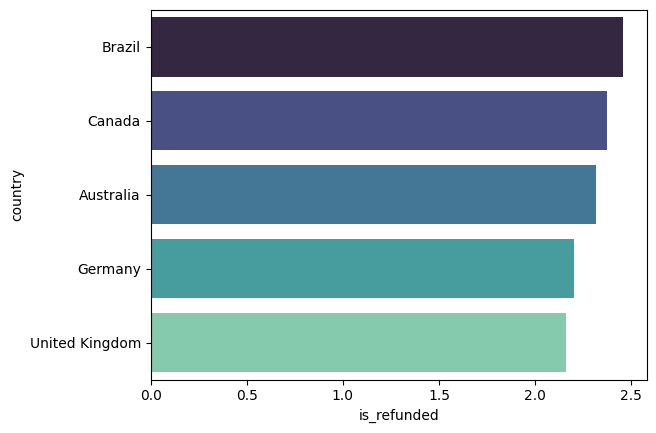

In [82]:
sns.barplot(data=high,x="is_refunded",y="country",palette="mako")

In [83]:
#9- channels - randaction and revenue

In [84]:
df.columns

Index(['event_type', 'event_date', 'country', 'latitude', 'longitude',
       'region', 'channel', 'payment_method', 'currency', 'quantity',
       'unit_price_local', 'discount_code', 'discount_local', 'tax_local',
       'net_revenue_local', 'fx_rate_to_usd', 'net_revenue_usd', 'is_refunded',
       'refund_datetime', 'refund_reason'],
      dtype='object')

In [85]:
df['channel'].value_counts()

,count
channel,
Website,21549
Direct Sales,9792
Reseller,6914
Partner,4884
Marketplace,4861


In [89]:
trans=df.groupby("channel")["net_revenue_usd"].sum().sort_values()

In [90]:
trans=trans.reset_index()

In [91]:
trans

,channel,net_revenue_usd
0,Partner,3252220.81
1,Marketplace,3344149.16
2,Reseller,4455871.00
3,Direct Sales,6359903.49
4,Website,14420137.02


/tmp/ipython-input-3591881863.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trans,x="channel",y="net_revenue_usd",palette="mako")


<Axes: xlabel='channel', ylabel='net_revenue_usd'>

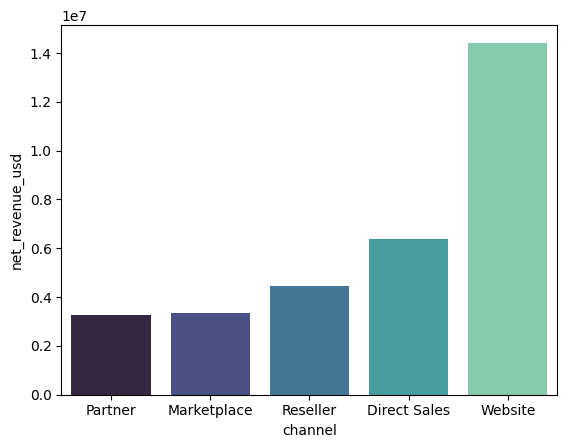

In [92]:
sns.barplot(data=trans,x="channel",y="net_revenue_usd",palette="mako")


In [93]:
#10 - payment method frequancy accross region

In [94]:
df.columns

Index(['event_type', 'event_date', 'country', 'latitude', 'longitude',
       'region', 'channel', 'payment_method', 'currency', 'quantity',
       'unit_price_local', 'discount_code', 'discount_local', 'tax_local',
       'net_revenue_local', 'fx_rate_to_usd', 'net_revenue_usd', 'is_refunded',
       'refund_datetime', 'refund_reason'],
      dtype='object')

In [95]:
df["payment_method"].unique()

array(['Credit Card', 'Invoice', 'Wire', 'PayPal'], dtype=object)

In [96]:
df["payment_method"].value_counts()

,count
payment_method,
Credit Card,26340
Invoice,12055
PayPal,7215
Wire,2390


In [97]:
df.groupby("region")["payment_method"].value_counts().unstack()

payment_method,Credit Card,Invoice,PayPal,Wire
region,,,,
APAC,3973,1843,1131,359
EU,10476,4745,2882,937
LATAM,1155,508,313,99
Unknown,10736,4959,2889,995


In [98]:
#11- relationship between payment method and refund probility

In [100]:
rel=df.groupby ("payment_method")["is_refunded"].mean()*100

In [101]:
rel=df.groupby ("payment_method")["is_refunded"].mean()*100

In [105]:
rel = rel.reset_index()

In [106]:
rel

,payment_method,is_refunded
0,Credit Card,2.110858
1,Invoice,1.957694
2,PayPal,2.106722
3,Wire,2.552301


/tmp/ipython-input-1492800319.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rel,x="payment_method",y="is_refunded",palette="mako")


<Axes: xlabel='payment_method', ylabel='is_refunded'>

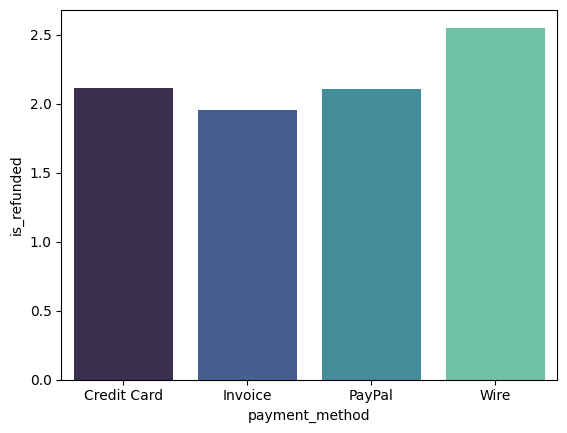

In [107]:
sns.barplot(data=rel,x="payment_method",y="is_refunded",palette="mako")


In [108]:
#11-

In [110]:
df["channel"].unique()

array(['Website', 'Partner', 'Direct Sales', 'Marketplace', 'Reseller'],
      dtype=object)

In [111]:
df["channel"].value_counts()

,count
channel,
Website,21549
Direct Sales,9792
Reseller,6914
Partner,4884
Marketplace,4861


In [113]:
df.groupby("channel")["net_revenue_usd"].mean().sort_values(ascending=False)

,net_revenue_usd
channel,
Marketplace,687.954980
Website,669.178942
Partner,665.892877
Direct Sales,649.499948
Reseller,644.470784


In [114]:
pay_method=df.groupby("channel")["net_revenue_usd"].mean().sort_values(ascending=False)

In [115]:
pay_method=pay_method.reset_index()

In [116]:
pay_method

,channel,net_revenue_usd
0,Marketplace,687.954980
1,Website,669.178942
2,Partner,665.892877
3,Direct Sales,649.499948
4,Reseller,644.470784


In [ ]:
sns.barplot(data="channel",x="payment_method",y="is_refunded",palette="mako")


In [117]:
Q1 = df["net_revenue_usd"].quantile(0.25)

In [118]:
Q1

np.float64(54.34)

In [119]:
Q3 = df["net_revenue_usd"].quantile(0.25)

In [120]:
Q3

np.float64(54.34)

In [121]:
IQR=Q3-Q1

In [122]:
IQR

np.float64(0.0)

In [123]:
Lower_bound=Q1-1.5*IQR

In [124]:
Lower_bound

np.float64(54.34)

In [125]:
Upper_Bound=Q3+1.5*IQR

In [126]:
Upper_Bound

np.float64(54.34)

<Axes: ylabel='net_revenue_usd'>

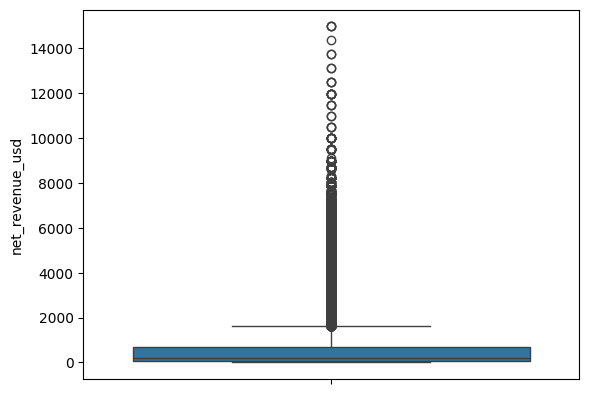

In [127]:
sns.boxplot(df['net_revenue_usd'])

In [129]:
df["Month"]=df['event_date'].dt.to_period("M")

In [131]:
df["Month"].head(5)

,Month
0,2024-12
1,2025-08
2,2025-09
3,2024-09
4,2024-06
